In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import uproot
import pandas as pd
import numpy as np
import math
from tqdm import tqdm




from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


print(uproot.__version__)
print(pd.__version__)

5.6.2
2.2.2


In [2]:
sig_query = 'truth_vtxInside==1 and truth_nuPdg==14 and truth_isCC==1'
sel_query  = 'numu_score>0.9 and numu_cc_flag>=0'
reco_0p_query = 'reco_Kp<35'
reco_Np_query = 'reco_Kp>=35'
true_0p_query = 'true_Kp<35'
true_Np_query = 'true_Kp>=35'

In [3]:
bdt_vars = ['numu_score','numu_cc_flag']
eval_vars = ['run','subrun','event','match_isFC']
eval_mc_vars = ['truth_vtxInside','truth_nuPdg','truth_isCC']
pf_eval_vars = ['reco_protonMomentum','reco_muonMomentum']

pf_eval_mc_vars = ['truth_startMomentum','truth_mother','truth_pdg','truth_muonMomentum']
pf_eval_reco_vars = ['reco_mother', 'reco_pdg', 'reco_nuvtxX', 'reco_nuvtxY', 'reco_nuvtxZ']
kine_vars = ['kine_pio_flag', 'kine_pio_vtx_dis', 'kine_pio_energy_1', 'kine_pio_energy_2', 'kine_pio_dis_1', 'kine_pio_dis_2', 'kine_pio_angle', 'kine_pio_mass']
containment_vars = ['reco_endXYZT', 'reco_startMomentum']
pandora_signal_vars = ['true_nu_vtx_x', 'true_nu_vtx_y', 'true_nu_vtx_z', 'ccnc', 'mc_pdg', 'mc_px', 'mc_py', 'mc_pz', 'weightSplineTimesTune']

In [4]:
file = uproot.open("hyper-unified/SURPRISE_Test_Samples_v10_04_07_05_Run4b_hyper_unified_reco2_BNB_beam_off_may8_reco2_hist_goodruns_62280841_snapshot.root")
file['wcpselection']['T_PFeval'].keys()

['run',
 'subrun',
 'event',
 'neutrino_type',
 'reco_nuvtxX',
 'reco_nuvtxY',
 'reco_nuvtxZ',
 'reco_showervtxX',
 'reco_showervtxY',
 'reco_showervtxZ',
 'reco_showerKE',
 'reco_muonvtxX',
 'reco_muonvtxY',
 'reco_muonvtxZ',
 'reco_muonMomentum',
 'evtDeltaTimeNS',
 'evtTimeNS',
 'reco_protonMomentum',
 'reco_showerMomentum',
 'reco_Nproton',
 'reco_Ntrack',
 'reco_id',
 'reco_pdg',
 'reco_process',
 'reco_mother',
 'reco_startXYZT',
 'reco_endXYZT',
 'reco_startMomentum',
 'reco_endMomentum',
 'reco_daughters',
 'mcs_mu_tracklen',
 'mcs_emu_tracklen',
 'mcs_emu_MCS',
 'mcs_ambiguity_MCS',
 'reco_larpid_classified',
 'reco_larpid_pdg',
 'reco_larpid_proccess',
 'reco_larpid_completeness',
 'reco_larpid_purity',
 'reco_larpid_pidScore_el',
 'reco_larpid_pidScore_ph',
 'reco_larpid_pidScore_mu',
 'reco_larpid_pidScore_pi',
 'reco_larpid_pidScore_pr',
 'reco_larpid_procScore_prim',
 'reco_larpid_procScore_ntrl',
 'reco_larpid_procScore_chgd',
 'Ph_Tot',
 'PMT_ID',
 'PMT_Time',
 'PMT_Amp

In [5]:
f_nu_overlay_run1 = uproot.open("SURPRISE_Test_Samples_v10_04_07_05_Run4b_hyper_unified_reco2_BNB_nu_overlay_may8_reco2_hist_62280499_snapshot.root")
f_nu_overlay_run1_bdt = f_nu_overlay_run1["wcpselection"]['T_BDTvars'].arrays(bdt_vars, library = 'pd')
f_nu_overlay_run1_eval = f_nu_overlay_run1["wcpselection"]["T_eval"].arrays(eval_vars+eval_mc_vars, library = 'pd')
f_nu_overlay_run1_pfeval = f_nu_overlay_run1["wcpselection"]["T_PFeval"].arrays(pf_eval_vars+pf_eval_mc_vars ,library = 'pd')
f_nu_overlay_run1_pfeval_reco = f_nu_overlay_run1["wcpselection"]["T_PFeval"].arrays(pf_eval_reco_vars, library = 'pd')
f_nu_overlay_run1_pfeval_reco_extra = f_nu_overlay_run1["wcpselection"]["T_PFeval"].arrays(containment_vars, library = 'pd')
f_nu_overlay_run1_kinevars = f_nu_overlay_run1["wcpselection"]["T_KINEvars"].arrays(kine_vars, library = 'pd')
f_nu_overlay_run1_pot = f_nu_overlay_run1["wcpselection"]["T_pot"].arrays(["pot_tor875good","runNo",'subRunNo'], library = 'pd')
pandora_signal_vars = f_nu_overlay_run1['nuselection']['NeutrinoSelectionFilter'].arrays(pandora_signal_vars, library = 'pd')
nu_overlay_run4_super_POT = np.sum(f_nu_overlay_run1_pot["pot_tor875good"].to_numpy())/1e19
nu_overlay_run4_super_df = pd.concat([f_nu_overlay_run1_bdt, pandora_signal_vars, f_nu_overlay_run1_eval, f_nu_overlay_run1_pfeval_reco_extra, f_nu_overlay_run1_pfeval, f_nu_overlay_run1_kinevars, f_nu_overlay_run1_pfeval_reco], axis=1, sort=False)

del f_nu_overlay_run1
del f_nu_overlay_run1_bdt
del f_nu_overlay_run1_eval
del f_nu_overlay_run1_pfeval
del f_nu_overlay_run1_pfeval_reco
del f_nu_overlay_run1_kinevars
del pandora_signal_vars

nu_overlay_run4_super_df["run_num"] = [1 for i in range(nu_overlay_run4_super_df.shape[0])]

nu_overlay_run4_super_df["rse_num"] = (nu_overlay_run4_super_df["run"].to_numpy() * 100_000_000_000
                         + nu_overlay_run4_super_df["subrun"].to_numpy() * 1_000_000
                         + nu_overlay_run4_super_df["event"].to_numpy())

print(nu_overlay_run4_super_df.shape[0])
nu_overlay_run4_super_df = nu_overlay_run4_super_df.drop_duplicates(subset=['rse_num'])
print(nu_overlay_run4_super_df.shape[0])



mu3 = nu_overlay_run4_super_df["reco_muonMomentum"].to_numpy() # needed to remove [3] as made key invalid
p3 = nu_overlay_run4_super_df["reco_protonMomentum"].to_numpy()  # needed to remove [3] as made key invalid

reco_Emuon = []
reco_Eproton = []

for i in range(len(mu3)):
    if(mu3[i][3]<=0): # added [3] to account for loss of index at initialization
        reco_Emuon.append(0)
    else: 
        reco_Emuon.append(mu3[i]*1000)
    
    if(p3[i][3]<=0): # added [3] to account for loss of index at initialization
        reco_Eproton.append(0)        
    else: 
        reco_Eproton.append(p3[i][3]*1000-938.27) # added [3] to account for loss of index at initialization


nu_overlay_run4_super_df["reco_Emu"] = reco_Emuon
nu_overlay_run4_super_df["reco_Kp"] = reco_Eproton

mu3 = nu_overlay_run4_super_df["truth_muonMomentum"].to_numpy()  # needed to remove [3] as made key invalid

true_Emuon = []
true_Eproton = []

for i in range(len(mu3)):
    if(mu3[i][3]<=0): # added [3] to account for loss of index at initialization
        true_Emuon.append(0)
    else: 
        true_Emuon.append(mu3[i][3]*1000)  # added [3] to account for loss of index at initialization
    


nu_overlay_run4_super_df["true_Emu"] = true_Emuon

truth_pdgs = nu_overlay_run4_super_df["truth_pdg"].to_numpy()
truth_mothers = nu_overlay_run4_super_df["truth_mother"].to_numpy()
truth_startMomentums = nu_overlay_run4_super_df["truth_startMomentum"].to_numpy()

true_Kp = []

for i in tqdm(range(nu_overlay_run4_super_df.shape[0])):

    truth_pdg_list = truth_pdgs[i]
    truth_mother_list = truth_mothers[i]
    truth_startMomentum_list = truth_startMomentums[i]
    
    Ep = 0
    
    for j in range(len(truth_pdg_list)):
        if truth_mother_list[j] == 0 and abs(truth_pdg_list[j]) == 2212 and truth_startMomentum_list[j][3]>Ep:
            Ep = truth_startMomentum_list[j][3]
            
    if(Ep<=0): 
        true_Kp.append(0)
    else: 
        true_Kp.append(Ep*1000-938.27)    

    
nu_overlay_run4_super_df["true_Kp"] = true_Kp

93745
93745


100%|█████████████████████████████████████████████████████████████████████████| 93745/93745 [00:01<00:00, 52361.45it/s]


In [6]:
f_nu_overlay_beam_off = uproot.open("hyper-unified/SURPRISE_Test_Samples_v10_04_07_05_Run4b_hyper_unified_reco2_BNB_beam_off_may8_reco2_hist_goodruns_62280841_snapshot.root")
f_nu_overlay_beam_off_bdt = f_nu_overlay_beam_off["wcpselection"]['T_BDTvars'].arrays(bdt_vars, library = 'pd')
f_nu_overlay_beam_off_eval = f_nu_overlay_beam_off["wcpselection"]["T_eval"].arrays(eval_vars, library = 'pd')
f_nu_overlay_beam_off_pfeval = f_nu_overlay_beam_off["wcpselection"]["T_PFeval"].arrays(pf_eval_vars ,library = 'pd')
f_nu_overlay_beam_off_pfeval_reco = f_nu_overlay_beam_off["wcpselection"]["T_PFeval"].arrays(pf_eval_reco_vars+containment_vars, library = 'pd')
f_nu_overlay_beam_off_kinevars = f_nu_overlay_beam_off["wcpselection"]["T_KINEvars"].arrays(kine_vars, library = 'pd')
f_nu_overlay_beam_off_pot = f_nu_overlay_beam_off["wcpselection"]["T_pot"].arrays(["pot_tor875good","runNo",'subRunNo'], library = 'pd')
f_nu_overlay_beam_off_pand = f_nu_overlay_beam_off['nuselection']['NeutrinoSelectionFilter'].arrays( ['true_nu_vtx_x', 'true_nu_vtx_y', 'true_nu_vtx_z', 'ccnc', 'mc_pdg', 'mc_px', 'mc_py', 'mc_pz'], library = 'pd')
nu_overlay_run4_super_POT = np.sum(f_nu_overlay_beam_off_pot["pot_tor875good"].to_numpy())/1e19
nu_overlay_beam_off_super_df = pd.concat([f_nu_overlay_beam_off_bdt, f_nu_overlay_beam_off_pand, f_nu_overlay_beam_off_eval, f_nu_overlay_beam_off_pfeval, f_nu_overlay_beam_off_kinevars, f_nu_overlay_beam_off_pfeval_reco], axis=1, sort=False)

del f_nu_overlay_beam_off
del f_nu_overlay_beam_off_bdt
del f_nu_overlay_beam_off_eval
del f_nu_overlay_beam_off_pfeval
del f_nu_overlay_beam_off_pfeval_reco
del f_nu_overlay_beam_off_kinevars
del f_nu_overlay_beam_off_pand

nu_overlay_beam_off_super_df["run_num"] = [1 for i in range(nu_overlay_beam_off_super_df.shape[0])]

nu_overlay_beam_off_super_df["rse_num"] = (nu_overlay_beam_off_super_df["run"].to_numpy() * 100_000_000_000
                         + nu_overlay_beam_off_super_df["subrun"].to_numpy() * 1_000_000
                         + nu_overlay_beam_off_super_df["event"].to_numpy())

print(nu_overlay_beam_off_super_df.shape[0])
nu_overlay_beam_off_super_df = nu_overlay_beam_off_super_df.drop_duplicates(subset=['rse_num'])
print(nu_overlay_beam_off_super_df.shape[0])



mu3 = nu_overlay_beam_off_super_df["reco_muonMomentum"].to_numpy() # needed to remove [3] as made key invalid
p3 = nu_overlay_beam_off_super_df["reco_protonMomentum"].to_numpy()  # needed to remove [3] as made key invalid

reco_Emuon = []
reco_Eproton = []

for i in range(len(mu3)):
    if(mu3[i][3]<=0): # added [3] to account for loss of index at initialization
        reco_Emuon.append(0)
    else: 
        reco_Emuon.append(mu3[i]*1000)
    
    if(p3[i][3]<=0): # added [3] to account for loss of index at initialization
        reco_Eproton.append(0)        
    else: 
        reco_Eproton.append(p3[i][3]*1000-938.27) # added [3] to account for loss of index at initialization


nu_overlay_beam_off_super_df["reco_Emu"] = reco_Emuon
nu_overlay_beam_off_super_df["reco_Kp"] = reco_Eproton

# mu3 = nu_overlay_beam_off_super_df["truth_muonMomentum"].to_numpy()  # needed to remove [3] as made key invalid

# true_Emuon = []
# true_Eproton = []

# for i in range(len(mu3)):
#     if(mu3[i][3]<=0): # added [3] to account for loss of index at initialization
#         true_Emuon.append(0)
#     else: 
#         true_Emuon.append(mu3[i][3]*1000)  # added [3] to account for loss of index at initialization
    


# nu_overlay_beam_off_super_df["true_Emu"] = true_Emuon

# truth_pdgs = nu_overlay_beam_off_super_df["truth_pdg"].to_numpy()
# truth_mothers = nu_overlay_beam_off_super_df["truth_mother"].to_numpy()
# truth_startMomentums = nu_overlay_beam_off_super_df["truth_startMomentum"].to_numpy()

# true_Kp = []

# for i in tqdm(range(nu_overlay_beam_off_super_df.shape[0])):

#     truth_pdg_list = truth_pdgs[i]
#     truth_mother_list = truth_mothers[i]
#     truth_startMomentum_list = truth_startMomentums[i]
    
#     Ep = 0
    
#     for j in range(len(truth_pdg_list)):
#         if truth_mother_list[j] == 0 and abs(truth_pdg_list[j]) == 2212 and truth_startMomentum_list[j][3]>Ep:
#             Ep = truth_startMomentum_list[j][3]
            
#     if(Ep<=0): 
#         true_Kp.append(0)
#     else: 
#         true_Kp.append(Ep*1000-938.27)    

    
# nu_overlay_beam_off_super_df["true_Kp"] = true_Kp

568505
568505


In [7]:
f_nu_overlay_dirt = uproot.open("hyper-unified/SURPRISE_Test_Samples_v10_04_07_05_Run4b_hyper_unified_reco2_BNB_dirt_may8_reco2_hist_62280564_snapshot.root")
f_nu_overlay_dirt_bdt = f_nu_overlay_dirt["wcpselection"]['T_BDTvars'].arrays(bdt_vars, library = 'pd')
f_nu_overlay_dirt_eval = f_nu_overlay_dirt["wcpselection"]["T_eval"].arrays(eval_vars, library = 'pd')
f_nu_overlay_dirt_pfeval = f_nu_overlay_dirt["wcpselection"]["T_PFeval"].arrays(pf_eval_vars ,library = 'pd')
f_nu_overlay_dirt_pfeval_reco = f_nu_overlay_dirt["wcpselection"]["T_PFeval"].arrays(pf_eval_reco_vars+containment_vars, library = 'pd')
f_nu_overlay_dirt_kinevars = f_nu_overlay_dirt["wcpselection"]["T_KINEvars"].arrays(kine_vars, library = 'pd')
f_nu_overlay_dirt_pot = f_nu_overlay_dirt["wcpselection"]["T_pot"].arrays(["pot_tor875good","runNo",'subRunNo'], library = 'pd')
f_nu_overlay_dirt_pand = f_nu_overlay_dirt['nuselection']['NeutrinoSelectionFilter'].arrays( ['true_nu_vtx_x', 'true_nu_vtx_y', 'true_nu_vtx_z', 'ccnc', 'mc_pdg', 'mc_px', 'mc_py', 'mc_pz'], library = 'pd')
nu_overlay_run4_super_POT = np.sum(f_nu_overlay_dirt_pot["pot_tor875good"].to_numpy())/1e19
nu_overlay_dirt_super_df = pd.concat([f_nu_overlay_dirt_bdt, f_nu_overlay_dirt_pand, f_nu_overlay_dirt_eval, f_nu_overlay_dirt_pfeval, f_nu_overlay_dirt_kinevars, f_nu_overlay_dirt_pfeval_reco], axis=1, sort=False)

del f_nu_overlay_dirt
del f_nu_overlay_dirt_bdt
del f_nu_overlay_dirt_eval
del f_nu_overlay_dirt_pfeval
del f_nu_overlay_dirt_pfeval_reco
del f_nu_overlay_dirt_kinevars
del f_nu_overlay_dirt_pand

nu_overlay_dirt_super_df["run_num"] = [1 for i in range(nu_overlay_dirt_super_df.shape[0])]

nu_overlay_dirt_super_df["rse_num"] = (nu_overlay_dirt_super_df["run"].to_numpy() * 100_000_000_000
                         + nu_overlay_dirt_super_df["subrun"].to_numpy() * 1_000_000
                         + nu_overlay_dirt_super_df["event"].to_numpy())

print(nu_overlay_dirt_super_df.shape[0])
nu_overlay_dirt_super_df = nu_overlay_dirt_super_df.drop_duplicates(subset=['rse_num'])
print(nu_overlay_dirt_super_df.shape[0])



mu3 = nu_overlay_dirt_super_df["reco_muonMomentum"].to_numpy() # needed to remove [3] as made key invalid
p3 = nu_overlay_dirt_super_df["reco_protonMomentum"].to_numpy()  # needed to remove [3] as made key invalid

reco_Emuon = []
reco_Eproton = []

for i in range(len(mu3)):
    if(mu3[i][3]<=0): # added [3] to account for loss of index at initialization
        reco_Emuon.append(0)
    else: 
        reco_Emuon.append(mu3[i]*1000)
    
    if(p3[i][3]<=0): # added [3] to account for loss of index at initialization
        reco_Eproton.append(0)        
    else: 
        reco_Eproton.append(p3[i][3]*1000-938.27) # added [3] to account for loss of index at initialization


nu_overlay_dirt_super_df["reco_Emu"] = reco_Emuon
nu_overlay_dirt_super_df["reco_Kp"] = reco_Eproton

# mu3 = nu_overlay_beam_off_super_df["truth_muonMomentum"].to_numpy()  # needed to remove [3] as made key invalid

# true_Emuon = []
# true_Eproton = []

# for i in range(len(mu3)):
#     if(mu3[i][3]<=0): # added [3] to account for loss of index at initialization
#         true_Emuon.append(0)
#     else: 
#         true_Emuon.append(mu3[i][3]*1000)  # added [3] to account for loss of index at initialization
    


# nu_overlay_beam_off_super_df["true_Emu"] = true_Emuon

# truth_pdgs = nu_overlay_beam_off_super_df["truth_pdg"].to_numpy()
# truth_mothers = nu_overlay_beam_off_super_df["truth_mother"].to_numpy()
# truth_startMomentums = nu_overlay_beam_off_super_df["truth_startMomentum"].to_numpy()

# true_Kp = []

# for i in tqdm(range(nu_overlay_beam_off_super_df.shape[0])):

#     truth_pdg_list = truth_pdgs[i]
#     truth_mother_list = truth_mothers[i]
#     truth_startMomentum_list = truth_startMomentums[i]
    
#     Ep = 0
    
#     for j in range(len(truth_pdg_list)):
#         if truth_mother_list[j] == 0 and abs(truth_pdg_list[j]) == 2212 and truth_startMomentum_list[j][3]>Ep:
#             Ep = truth_startMomentum_list[j][3]
            
#     if(Ep<=0): 
#         true_Kp.append(0)
#     else: 
#         true_Kp.append(Ep*1000-938.27)    

    
# nu_overlay_beam_off_super_df["true_Kp"] = true_Kp

45155
45155


In [8]:
f_nu_overlay_beam_on = uproot.open("hyper-unified/SURPRISE_Test_Samples_v10_04_07_05_Run4b_hyper_unified_reco2_BNB_beam_on_may8_reco2_hist_goodruns_62280934_snapshot.root")
f_nu_overlay_beam_on_bdt = f_nu_overlay_beam_on["wcpselection"]['T_BDTvars'].arrays(bdt_vars, library = 'pd')
f_nu_overlay_beam_on_eval = f_nu_overlay_beam_on["wcpselection"]["T_eval"].arrays(eval_vars, library = 'pd')
f_nu_overlay_beam_on_pfeval = f_nu_overlay_beam_on["wcpselection"]["T_PFeval"].arrays(pf_eval_vars ,library = 'pd')
f_nu_overlay_beam_on_pfeval_reco = f_nu_overlay_beam_on["wcpselection"]["T_PFeval"].arrays(pf_eval_reco_vars+containment_vars, library = 'pd')
f_nu_overlay_beam_on_kinevars = f_nu_overlay_beam_on["wcpselection"]["T_KINEvars"].arrays(kine_vars, library = 'pd')
f_nu_overlay_beam_on_pot = f_nu_overlay_beam_on["wcpselection"]["T_pot"].arrays(["pot_tor875good","runNo",'subRunNo'], library = 'pd')
f_nu_overlay_beam_on_pand = f_nu_overlay_beam_on['nuselection']['NeutrinoSelectionFilter'].arrays( ['true_nu_vtx_x', 'true_nu_vtx_y', 'true_nu_vtx_z', 'ccnc', 'mc_pdg', 'mc_px', 'mc_py', 'mc_pz'], library = 'pd')
nu_overlay_run4_super_POT = np.sum(f_nu_overlay_beam_on_pot["pot_tor875good"].to_numpy())/1e19
nu_overlay_beam_on_super_df = pd.concat([f_nu_overlay_beam_on_bdt, f_nu_overlay_beam_on_pand, f_nu_overlay_beam_on_eval, f_nu_overlay_beam_on_pfeval, f_nu_overlay_beam_on_kinevars, f_nu_overlay_beam_on_pfeval_reco], axis=1, sort=False)

del f_nu_overlay_beam_on
del f_nu_overlay_beam_on_bdt
del f_nu_overlay_beam_on_eval
del f_nu_overlay_beam_on_pfeval
del f_nu_overlay_beam_on_pfeval_reco
del f_nu_overlay_beam_on_kinevars
del f_nu_overlay_beam_on_pand

nu_overlay_beam_on_super_df["run_num"] = [1 for i in range(nu_overlay_beam_on_super_df.shape[0])]

nu_overlay_beam_on_super_df["rse_num"] = (nu_overlay_beam_on_super_df["run"].to_numpy() * 100_000_000_000
                         + nu_overlay_beam_on_super_df["subrun"].to_numpy() * 1_000_000
                         + nu_overlay_beam_on_super_df["event"].to_numpy())

print(nu_overlay_beam_on_super_df.shape[0])
nu_overlay_beam_on_super_df = nu_overlay_beam_on_super_df.drop_duplicates(subset=['rse_num'])
print(nu_overlay_beam_on_super_df.shape[0])



mu3 = nu_overlay_beam_on_super_df["reco_muonMomentum"].to_numpy() # needed to remove [3] as made key invalid
p3 = nu_overlay_beam_on_super_df["reco_protonMomentum"].to_numpy()  # needed to remove [3] as made key invalid

reco_Emuon = []
reco_Eproton = []

for i in range(len(mu3)):
    if(mu3[i][3]<=0): # added [3] to account for loss of index at initialization
        reco_Emuon.append(0)
    else: 
        reco_Emuon.append(mu3[i]*1000)
    
    if(p3[i][3]<=0): # added [3] to account for loss of index at initialization
        reco_Eproton.append(0)        
    else: 
        reco_Eproton.append(p3[i][3]*1000-938.27) # added [3] to account for loss of index at initialization


nu_overlay_beam_on_super_df["reco_Emu"] = reco_Emuon
nu_overlay_beam_on_super_df["reco_Kp"] = reco_Eproton

# mu3 = nu_overlay_beam_off_super_df["truth_muonMomentum"].to_numpy()  # needed to remove [3] as made key invalid

# true_Emuon = []
# true_Eproton = []

# for i in range(len(mu3)):
#     if(mu3[i][3]<=0): # added [3] to account for loss of index at initialization
#         true_Emuon.append(0)
#     else: 
#         true_Emuon.append(mu3[i][3]*1000)  # added [3] to account for loss of index at initialization
    


# nu_overlay_beam_off_super_df["true_Emu"] = true_Emuon

# truth_pdgs = nu_overlay_beam_off_super_df["truth_pdg"].to_numpy()
# truth_mothers = nu_overlay_beam_off_super_df["truth_mother"].to_numpy()
# truth_startMomentums = nu_overlay_beam_off_super_df["truth_startMomentum"].to_numpy()

# true_Kp = []

# for i in tqdm(range(nu_overlay_beam_off_super_df.shape[0])):

#     truth_pdg_list = truth_pdgs[i]
#     truth_mother_list = truth_mothers[i]
#     truth_startMomentum_list = truth_startMomentums[i]
    
#     Ep = 0
    
#     for j in range(len(truth_pdg_list)):
#         if truth_mother_list[j] == 0 and abs(truth_pdg_list[j]) == 2212 and truth_startMomentum_list[j][3]>Ep:
#             Ep = truth_startMomentum_list[j][3]
            
#     if(Ep<=0): 
#         true_Kp.append(0)
#     else: 
#         true_Kp.append(Ep*1000-938.27)    

    
# nu_overlay_beam_off_super_df["true_Kp"] = true_Kp

459154
459154


In [9]:
import numpy as np
def magnitude(x, y, z):
    mag = np.sqrt(x**2 + y**2 + z**2)
    return mag

In [10]:
def is_meson(pdg_code):
    abs_pdg = np.std(pdg_code)
    if abs_pdg >= 9900000:
        return False
    thousands = (abs_pdg / 1000) % 10
    if thousands != 0:
        return False
    hundreds = (abs_pdg / 100) % 10
    if hundreds == 0:
        return False
    if abs_pdg >= 901 and abs_pdg <= 930:
        return False
    if abs_pdg == 110 or abs_pdg == 990:
        return False
    if abs_pdg == 998 or abs_pdg == 999:
        return False
    if abs_pdg == 100:
        return False
    else:
        return True

In [11]:

truth_vtxInside = nu_overlay_run4_super_df["truth_vtxInside"].to_numpy()
truth_nuPdg = nu_overlay_run4_super_df["truth_nuPdg"].to_numpy()
truth_isCC = nu_overlay_run4_super_df["truth_isCC"].to_numpy()

numu_score = nu_overlay_run4_super_df["numu_score"].to_numpy()
numu_cc_flag = nu_overlay_run4_super_df["numu_cc_flag"].to_numpy()

match_isFC = nu_overlay_run4_super_df["match_isFC"].to_numpy()

reco_Kp = nu_overlay_run4_super_df["reco_Kp"].to_numpy()
true_Kp = nu_overlay_run4_super_df["true_Kp"].to_numpy()
reco_mother = nu_overlay_run4_super_df["reco_mother"].to_numpy()
reco_pdg = nu_overlay_run4_super_df["reco_pdg"].to_numpy()

reco_endXYZT = nu_overlay_run4_super_df["reco_endXYZT"].to_numpy()
reco_startMomentum = nu_overlay_run4_super_df['reco_startMomentum'].to_numpy()
reco_muonMomentum = nu_overlay_run4_super_df['reco_muonMomentum'].to_numpy()
reco_protonMomentum = nu_overlay_run4_super_df['reco_protonMomentum'].to_numpy()

run = nu_overlay_run4_super_df["run"].to_numpy()
subrun = nu_overlay_run4_super_df["subrun"].to_numpy()
event = nu_overlay_run4_super_df["event"].to_numpy()

true_nu_vtx_x = nu_overlay_run4_super_df['true_nu_vtx_x'].to_numpy()
true_nu_vtx_y = nu_overlay_run4_super_df['true_nu_vtx_y'].to_numpy()
true_nu_vtx_z = nu_overlay_run4_super_df['true_nu_vtx_z'].to_numpy()
mc_pdg = nu_overlay_run4_super_df['mc_pdg'].to_numpy()
truth_muonMomentum = nu_overlay_run4_super_df["truth_muonMomentum"].to_numpy()

reco_nuvtxX = nu_overlay_run4_super_df["reco_nuvtxX"].to_numpy()
reco_nuvtxY = nu_overlay_run4_super_df["reco_nuvtxY"].to_numpy()
reco_nuvtxZ = nu_overlay_run4_super_df["reco_nuvtxZ"].to_numpy()
weight = nu_overlay_run4_super_df['weightSplineTimesTune'].to_numpy()

kine_pio_flag = nu_overlay_run4_super_df['kine_pio_flag'].to_numpy()
kine_pio_vtx_dis = nu_overlay_run4_super_df['kine_pio_vtx_dis'].to_numpy()
kine_pio_energy_1 = nu_overlay_run4_super_df['kine_pio_energy_1'].to_numpy()
kine_pio_energy_2 = nu_overlay_run4_super_df['kine_pio_energy_2'].to_numpy()
kine_pio_dis_1 = nu_overlay_run4_super_df['kine_pio_dis_1'].to_numpy()
kine_pio_dis_2 = nu_overlay_run4_super_df['kine_pio_dis_2'].to_numpy()
kine_pio_angle = nu_overlay_run4_super_df['kine_pio_angle'].to_numpy()
kine_pio_mass = nu_overlay_run4_super_df['kine_pio_mass'].to_numpy()

em_charge_scale = np.ones(len(nu_overlay_run4_super_df)) # set to 1 for MC 

output_file = "Dillon_list_signal_comparison.txt" 
f = open(output_file, "a")
f.write("run  subrun  event  selXp  sel0p  selNp  sel0pi#  sel0pi0  sel0pi  selNp0pi  FC  sigPan  sigXp  sig0p  sigNp  muon_idx  contained")
f.write("\n")
sig_added = 0
pand_sig_added = len(weight)
sel_added = 0
sel_and_sig = {'selXp': [], 'sel0p': [], 'selNp': [], 'FC': [], 'signal': [], 'sel0pi#': [], 'sel0pi0': [], 'sel0pi': [], 'selNp0pi': [], 'numu_score': [], 'numu_cc_flag': [], 'contained': [], 'muon_idx': [], 'pandora_sig':[], 'weight':[], 'source':[], 'Pp':[]}
for e in tqdm(range(len(truth_vtxInside))):
    
    flag_sig = 0
    if truth_isCC[e]==1 and truth_nuPdg[e]==14 and truth_vtxInside[e]==1:
        flag_sig = 1
        sig_added += 1

    flag_sel = 0
    if numu_score[e]>0.9 and numu_cc_flag[e]>=0:
        flag_sel = 1
        sel_added += 1

    flag_reco0p = 1
    flag_recoNp = 0
    if reco_Kp[e]>=35: 
        flag_reco0p = 0
        flag_recoNp = 1

        
    flag_true0p = 1
    flag_trueNp = 0
    if true_Kp[e]>=35: 
        flag_true0p = 0
        flag_trueNp = 1 

    FC = 0
    if match_isFC[e]==True:
        FC=1

    flag_0_charged_pi = 1
    contained = 0
    muon_idx = -1
    epsilon = 1e-10
    for i in range(len(reco_startMomentum[e])):
        
        if reco_mother[e][i] == 0 and reco_pdg[e][i] == 211 and reco_startMomentum[e][i][3] > 0.01+0.1396:
            flag_0_charged_pi = 0
        pi_count = 0
        if reco_mother[e][i] == 0 and reco_pdg[e][i] == 13 and reco_startMomentum[e][i][3] > 0.01+0.1057:
            pi_count +=1
            if pi_count > 1:
                flag_0_charged_pi = 0

        if np.abs(reco_startMomentum[e][i][3] - reco_muonMomentum[e][3]) < epsilon:
            muon_idx = i
            if reco_endXYZT[e][i][0] > 10.0 and reco_endXYZT[e][i][0] < 246.35 and reco_endXYZT[e][i][1] > -106.50 and reco_endXYZT[e][i][1] < 106.50 and reco_endXYZT[e][i][2] > 10.0 and reco_endXYZT[e][i][2] < 1026.8:
                contained = 1

    flag_0_pi0 = 0
    if not (kine_pio_flag[e] == 1 and kine_pio_vtx_dis[e] < 9 
            and kine_pio_energy_1[e] * em_charge_scale[e] > 40 
            and kine_pio_energy_2[e] * em_charge_scale[e] > 25 
            and kine_pio_dis_1[e] < 110 and kine_pio_dis_2[e] < 120 
            and kine_pio_angle[e] > 0 and kine_pio_angle[e] < 174 
            and kine_pio_mass[e]* em_charge_scale[e] > 22 
            and kine_pio_mass[e] * em_charge_scale[e] < 300):
        flag_0_pi0 = 1
    pandora_signal_flag = 1
    isProton = False
    leading = -99
    mesons = 0
    for i in range(len(mc_pdg[e])):
        if mc_pdg[e][i] == 2212:
            isProton = True
            mag = magnitude(truth_startMomentums[e][i][0], truth_startMomentums[e][i][1], truth_startMomentums[e][i][2])
            if mag > leading:
                leading = mag
            if is_meson(mc_pdg[e][i]):
                mesons += 1
                break
            
    
    
    if (reco_nuvtxX[e] > 234.85 or reco_nuvtxX[e] < 21.5
        or reco_nuvtxY[e] > 95.00 or reco_nuvtxY[e] < -95.00
        or reco_nuvtxZ[e] > 966.80 or reco_nuvtxZ[e] < 21.5
        or isProton == False 
        or magnitude(truth_muonMomentum[e][0], truth_muonMomentum[e][1], truth_muonMomentum[e][2]) >1.2 
        or magnitude(truth_muonMomentum[e][0], truth_muonMomentum[e][1], truth_muonMomentum[e][2]) < 0.1
        or leading > 1.0 or leading < 0.25 or mesons != 0):
        pandora_signal_flag = 0
        pand_sig_added -= 1
    
   
    
    
    
    sel_and_sig['selXp'].append(flag_sel)
    sel_and_sig['sel0p'].append(flag_sel*flag_reco0p)
    sel_and_sig['selNp'].append(flag_sel*flag_recoNp)
    sel_and_sig['FC'].append(FC)
    sel_and_sig['signal'].append(flag_sig)
    sel_and_sig['sel0pi#'].append(flag_sel*flag_0_charged_pi)
    sel_and_sig['sel0pi0'].append(flag_sel*flag_0_pi0)
    sel_and_sig['selNp0pi'].append(flag_sel*flag_0_pi0*flag_0_charged_pi*flag_recoNp)
    sel_and_sig['sel0pi'].append(flag_0_pi0*flag_0_charged_pi)
    sel_and_sig['contained'].append(contained)
    sel_and_sig['muon_idx'].append(muon_idx)
    sel_and_sig['pandora_sig'].append(pandora_signal_flag)
    sel_and_sig['weight'].append(weight[e])
    sel_and_sig['numu_score'].append(numu_score[e])
    sel_and_sig['numu_cc_flag'].append(em_charge_scale[e])
    sel_and_sig['source'].append(0)
    sel_and_sig['Pp'].append(magnitude(reco_protonMomentum[e][0], reco_protonMomentum[e][1], reco_protonMomentum[e][2]))
    

    string = f"{run[e]}  {subrun[e]}  {event[e]}  {flag_sel}  {flag_sel*flag_reco0p}  {flag_sel*flag_recoNp}  {flag_sel*flag_0_charged_pi}  {flag_sel*flag_0_pi0}  {flag_sel*flag_0_pi0*flag_0_charged_pi}  {flag_sel*flag_0_pi0*flag_0_charged_pi*flag_recoNp}  {FC}  {pandora_signal_flag}  {flag_sig}  {flag_sig*flag_true0p}  {flag_sig*flag_trueNp}  {muon_idx}  {contained}"
    f.write(string)
    f.write("\n")
    
f.write("end")    
f.close()

print(sel_added)
print(sig_added)
print(pand_sig_added)

100%|██████████████████████████████████████████████████████████████████████████| 93745/93745 [00:30<00:00, 3064.01it/s]

19690
27908
11655


In [12]:
sel_and_sig['Pp']

[1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 0.817295707823712,
 0.47070127767979947,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 0.43226842504144253,
 1.7320508075688772,
 0.5101278698732424,
 0.7691075595438501,
 1.7320508075688772,
 0.762591287991666,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 0.3716589122279054,
 0.6965029669351409,
 1.7320508075688772,
 1.7320508075688772,
 0.4048318932614791,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075688772,
 1.7320508075

In [13]:

# truth_vtxInside = nu_overlay_beam_off_super_df["truth_vtxInside"].to_numpy()
# truth_nuPdg = nu_overlay_beam_off_super_df["truth_nuPdg"].to_numpy()
# truth_isCC = nu_overlay_beam_off_super_df["truth_isCC"].to_numpy()

numu_score = nu_overlay_beam_off_super_df["numu_score"].to_numpy()
numu_cc_flag = nu_overlay_beam_off_super_df["numu_cc_flag"].to_numpy()

match_isFC = nu_overlay_beam_off_super_df["match_isFC"].to_numpy()

reco_Kp = nu_overlay_beam_off_super_df["reco_Kp"].to_numpy()
#true_Kp = nu_overlay_beam_off_super_df["true_Kp"].to_numpy()
reco_mother = nu_overlay_beam_off_super_df["reco_mother"].to_numpy()
reco_pdg = nu_overlay_beam_off_super_df["reco_pdg"].to_numpy()

reco_endXYZT = nu_overlay_beam_off_super_df["reco_endXYZT"].to_numpy()
reco_startMomentum = nu_overlay_beam_off_super_df['reco_startMomentum'].to_numpy()
reco_muonMomentum = nu_overlay_beam_off_super_df['reco_muonMomentum'].to_numpy()
reco_protonMomentum = nu_overlay_beam_off_super_df['reco_protonMomentum'].to_numpy()

run = nu_overlay_beam_off_super_df["run"].to_numpy()
subrun = nu_overlay_beam_off_super_df["subrun"].to_numpy()
event = nu_overlay_beam_off_super_df["event"].to_numpy()

true_nu_vtx_x = nu_overlay_beam_off_super_df['true_nu_vtx_x'].to_numpy()
true_nu_vtx_y = nu_overlay_beam_off_super_df['true_nu_vtx_y'].to_numpy()
true_nu_vtx_z = nu_overlay_beam_off_super_df['true_nu_vtx_z'].to_numpy()
mc_pdg = nu_overlay_beam_off_super_df['mc_pdg'].to_numpy()
# truth_muonMomentum = nu_overlay_beam_off_super_df["truth_muonMomentum"].to_numpy()

reco_nuvtxX = nu_overlay_beam_off_super_df["reco_nuvtxX"].to_numpy()
reco_nuvtxY = nu_overlay_beam_off_super_df["reco_nuvtxY"].to_numpy()
reco_nuvtxZ = nu_overlay_beam_off_super_df["reco_nuvtxZ"].to_numpy()
# weight = nu_overlay_beam_off_super_df['weightSplineTimesTune'].to_numpy()

em_charge_scale = np.ones(len(nu_overlay_beam_off_super_df)) # set to 1 for MC 

kine_pio_vtx_dis = nu_overlay_beam_off_super_df['kine_pio_vtx_dis'].to_numpy()
kine_pio_energy_1 = nu_overlay_beam_off_super_df['kine_pio_energy_1'].to_numpy()
kine_pio_energy_2 = nu_overlay_beam_off_super_df['kine_pio_energy_2'].to_numpy()
kine_pio_dis_1 = nu_overlay_beam_off_super_df['kine_pio_dis_1'].to_numpy()
kine_pio_dis_2 = nu_overlay_beam_off_super_df['kine_pio_dis_2'].to_numpy()
kine_pio_angle = nu_overlay_beam_off_super_df['kine_pio_angle'].to_numpy()
kine_pio_mass = nu_overlay_beam_off_super_df['kine_pio_mass'].to_numpy()
kine_pio_flag = nu_overlay_beam_off_super_df['kine_pio_flag'].to_numpy()


#output_file = "Dillon_list_signal_comparison.txt" 
#f = open(output_file, "a")
#f.write("run  subrun  event  selXp  sel0p  selNp  sel0pi#  sel0pi0  sel0pi  selNp0pi  FC  sigPan  sigXp  sig0p  sigNp  muon_idx  contained")
#f.write("\n")
sel_added = 0
contained_added = 0
noPi_added = 0
for e in tqdm(range(len(numu_score))):
    
    flag_sig = 0
    # if truth_isCC[e]==1 and truth_nuPdg[e]==14 and truth_vtxInside[e]==1:
    #     flag_sig = 1


    flag_sel = 0
    if numu_score[e]>0.9 and numu_cc_flag[e]>=0:
        flag_sel = 1
        sel_added += 1

    flag_reco0p = 1
    flag_recoNp = 0
    if reco_Kp[e]>=35: 
        flag_reco0p = 0
        flag_recoNp = 1

        
    # flag_true0p = 1
    # flag_trueNp = 0
    # if true_Kp[e]>=35: 
    #     flag_true0p = 0
    #     flag_trueNp = 1 

    FC = 0
    if match_isFC[e]==True:
        FC=1

    flag_0_charged_pi = 1
    contained = 0
    muon_idx = -1
    epsilon = 1e-10
    for i in range(len(reco_startMomentum[e])):
        
        if reco_mother[e][i] == 0 and reco_pdg[e][i] == 211 and reco_startMomentum[e][i][3] > 0.01+0.1396:
            flag_0_charged_pi = 0
        pi_count = 0
        if reco_mother[e][i] == 0 and reco_pdg[e][i] == 13 and reco_startMomentum[e][i][3] > 0.01+0.1057:
            pi_count +=1
            if pi_count > 1:
                flag_0_charged_pi = 0

        if np.abs(reco_startMomentum[e][i][3] - reco_muonMomentum[e][3]) < epsilon:
            muon_idx = i
            if reco_endXYZT[e][i][0] > 10.0 and reco_endXYZT[e][i][0] < 246.35 and reco_endXYZT[e][i][1] > -106.50 and reco_endXYZT[e][i][1] < 106.50 and reco_endXYZT[e][i][2] > 10.0 and reco_endXYZT[e][i][2] < 1026.8:
                contained = 1
                contained_added += 1

    flag_0_pi0 = 0
    if not (kine_pio_flag[e] == 1 and kine_pio_vtx_dis[e] < 9 
            and kine_pio_energy_1[e] * em_charge_scale[e] > 40 
            and kine_pio_energy_2[e] * em_charge_scale[e] > 25 
            and kine_pio_dis_1[e] < 110 and kine_pio_dis_2[e] < 120 
            and kine_pio_angle[e] > 0 and kine_pio_angle[e] < 174 
            and kine_pio_mass[e]* em_charge_scale[e] > 22 
            and kine_pio_mass[e] * em_charge_scale[e] < 300):
        flag_0_pi0 = 1
        
    pandora_signal_flag = 0
    # isProton = False
    # leading = -99
    # mesons = 0
    # for i in range(len(reco_startMomentum[e])):
    #     if mc_pdg[e][i] == 2212:
    #         isProton = True
    #         mag = magnitude(reco_startMomentum[e][i][0], reco_startMomentums[e][i][1], reco_startMomentums[e][i][2])
    #         if mag > leading:
    #             leading = mag
    #         if is_meson(mc_pdg[e][i]):
    #             mesons += 1
    #             break
            
    
    
    if (reco_nuvtxX[e] > 234.85 or reco_nuvtxX[e] < 21.5
        or reco_nuvtxY[e] > 95.00 or reco_nuvtxY[e] < -95.00
        or reco_nuvtxZ[e] > 966.80 or reco_nuvtxZ[e] < 21.5
        or isProton == False 
        or magnitude(reco_muonMomentum[e][0], reco_muonMomentum[e][1], reco_muonMomentum[e][2]) >1.2 
        or magnitude(reco_muonMomentum[e][0], reco_muonMomentum[e][1], reco_muonMomentum[e][2]) < 0.1
        or leading > 1.0 or leading < 0.25 or mesons != 0):
        pandora_signal_flag = 0
    
   
    
    
    
    sel_and_sig['selXp'].append(flag_sel)
    sel_and_sig['sel0p'].append(flag_sel*flag_reco0p)
    sel_and_sig['selNp'].append(flag_sel*flag_recoNp)
    sel_and_sig['FC'].append(FC)
    sel_and_sig['signal'].append(flag_sig)
    sel_and_sig['sel0pi#'].append(flag_sel*flag_0_charged_pi)
    sel_and_sig['sel0pi0'].append(flag_sel*flag_0_pi0)
    sel_and_sig['selNp0pi'].append(flag_sel*flag_0_pi0*flag_0_charged_pi*flag_recoNp)
    sel_and_sig['sel0pi'].append(flag_0_pi0*flag_0_charged_pi)
    sel_and_sig['contained'].append(contained)
    sel_and_sig['muon_idx'].append(muon_idx)
    sel_and_sig['pandora_sig'].append(pandora_signal_flag)
    sel_and_sig['weight'].append(1)
    sel_and_sig['numu_score'].append(numu_score[e])
    sel_and_sig['numu_cc_flag'].append(1)
    sel_and_sig['source'].append(1)
    sel_and_sig['Pp'].append(magnitude(reco_protonMomentum[e][0], reco_protonMomentum[e][1], reco_protonMomentum[e][2]))


    #string = f"{run[e]}  {subrun[e]}  {event[e]}  {flag_sel}  {flag_sel*flag_reco0p}  {flag_sel*flag_recoNp}  {flag_sel*flag_0_charged_pi}  {flag_sel*flag_0_pi0}  {flag_sel*flag_0_pi0*flag_0_charged_pi}  {flag_sel*flag_0_pi0*flag_0_charged_pi*flag_recoNp}  {FC}  {pandora_signal_flag}  {flag_sig}  {flag_sig*flag_true0p}  {flag_sig*flag_trueNp}  {muon_idx}  {contained}"
    #f.write(string)
    #f.write("\n")
    
#f.write("end")    
#f.close()
print(sel_added)
print(contained_added)
print(noPi_added)

100%|███████████████████████████████████████████████████████████████████████| 568505/568505 [00:23<00:00, 23760.38it/s]

1070
2918
0


In [14]:

# truth_vtxInside = nu_overlay_beam_off_super_df["truth_vtxInside"].to_numpy()
# truth_nuPdg = nu_overlay_beam_off_super_df["truth_nuPdg"].to_numpy()
# truth_isCC = nu_overlay_beam_off_super_df["truth_isCC"].to_numpy()

numu_score = nu_overlay_dirt_super_df["numu_score"].to_numpy()
numu_cc_flag = nu_overlay_dirt_super_df["numu_cc_flag"].to_numpy()

match_isFC = nu_overlay_dirt_super_df["match_isFC"].to_numpy()

reco_Kp = nu_overlay_dirt_super_df["reco_Kp"].to_numpy()
#true_Kp = nu_overlay_dirt_super_df["true_Kp"].to_numpy()
reco_mother = nu_overlay_dirt_super_df["reco_mother"].to_numpy()
reco_pdg = nu_overlay_dirt_super_df["reco_pdg"].to_numpy()

reco_endXYZT = nu_overlay_dirt_super_df["reco_endXYZT"].to_numpy()
reco_startMomentum = nu_overlay_dirt_super_df['reco_startMomentum'].to_numpy()
reco_muonMomentum = nu_overlay_dirt_super_df['reco_muonMomentum'].to_numpy()
reco_protonMomentum = nu_overlay_dirt_super_df['reco_protonMomentum'].to_numpy()

run = nu_overlay_dirt_super_df["run"].to_numpy()
subrun = nu_overlay_dirt_super_df["subrun"].to_numpy()
event = nu_overlay_dirt_super_df["event"].to_numpy()

true_nu_vtx_x = nu_overlay_dirt_super_df['true_nu_vtx_x'].to_numpy()
true_nu_vtx_y = nu_overlay_dirt_super_df['true_nu_vtx_y'].to_numpy()
true_nu_vtx_z = nu_overlay_dirt_super_df['true_nu_vtx_z'].to_numpy()
mc_pdg = nu_overlay_dirt_super_df['mc_pdg'].to_numpy()
# truth_muonMomentum = nu_overlay_dirt_super_df["truth_muonMomentum"].to_numpy()

reco_nuvtxX = nu_overlay_dirt_super_df["reco_nuvtxX"].to_numpy()
reco_nuvtxY = nu_overlay_dirt_super_df["reco_nuvtxY"].to_numpy()
reco_nuvtxZ = nu_overlay_dirt_super_df["reco_nuvtxZ"].to_numpy()
# weight = nu_overlay_dirt_super_df['weightSplineTimesTune'].to_numpy()


kine_pio_vtx_dis = nu_overlay_dirt_super_df['kine_pio_vtx_dis'].to_numpy()
kine_pio_energy_1 = nu_overlay_dirt_super_df['kine_pio_energy_1'].to_numpy()
kine_pio_energy_2 = nu_overlay_dirt_super_df['kine_pio_energy_2'].to_numpy()
kine_pio_dis_1 = nu_overlay_dirt_super_df['kine_pio_dis_1'].to_numpy()
kine_pio_dis_2 = nu_overlay_dirt_super_df['kine_pio_dis_2'].to_numpy()
kine_pio_angle = nu_overlay_dirt_super_df['kine_pio_angle'].to_numpy()
kine_pio_mass = nu_overlay_dirt_super_df['kine_pio_mass'].to_numpy()
kine_pio_flag = nu_overlay_dirt_super_df['kine_pio_flag'].to_numpy()
em_charge_scale = np.ones(len(nu_overlay_dirt_super_df)) # set to 1 for MC 


#output_file = "Dillon_list_signal_comparison.txt" 
#f = open(output_file, "a")
#f.write("run  subrun  event  selXp  sel0p  selNp  sel0pi#  sel0pi0  sel0pi  selNp0pi  FC  sigPan  sigXp  sig0p  sigNp  muon_idx  contained")
#f.write("\n")

for e in tqdm(range(len(numu_score))):
    
    flag_sig = 0
    # if truth_isCC[e]==1 and truth_nuPdg[e]==14 and truth_vtxInside[e]==1:
    #     flag_sig = 1


    flag_sel = 0
    if numu_score[e]>0.9 and numu_cc_flag[e]>=0:
        flag_sel = 1

    flag_reco0p = 1
    flag_recoNp = 0
    if reco_Kp[e]>=35: 
        flag_reco0p = 0
        flag_recoNp = 1

        
    # flag_true0p = 1
    # flag_trueNp = 0
    # if true_Kp[e]>=35: 
    #     flag_true0p = 0
    #     flag_trueNp = 1 

    FC = 0
    if match_isFC[e]==True:
        FC=1

    flag_0_charged_pi = 1
    contained = 0
    muon_idx = -1
    epsilon = 1e-10
    for i in range(len(reco_startMomentum[e])):
        
        if reco_mother[e][i] == 0 and reco_pdg[e][i] == 211 and reco_startMomentum[e][i][3] > 0.01+0.1396:
            flag_0_charged_pi = 0
        pi_count = 0
        if reco_mother[e][i] == 0 and reco_pdg[e][i] == 13 and reco_startMomentum[e][i][3] > 0.01+0.1057:
            pi_count +=1
            if pi_count > 1:
                flag_0_charged_pi = 0

        if np.abs(reco_startMomentum[e][i][3] - reco_muonMomentum[e][3]) < epsilon:
            muon_idx = i
            if reco_endXYZT[e][i][0] > 10.0 and reco_endXYZT[e][i][0] < 246.35 and reco_endXYZT[e][i][1] > -106.50 and reco_endXYZT[e][i][1] < 106.50 and reco_endXYZT[e][i][2] > 10.0 and reco_endXYZT[e][i][2] < 1026.8:
                contained = 1

    flag_0_pi0 = 0
    if not (kine_pio_flag[e] == 1 and kine_pio_vtx_dis[e] < 9 
            and kine_pio_energy_1[e] * em_charge_scale[e] > 40 
            and kine_pio_energy_2[e] * em_charge_scale[e] > 25 
            and kine_pio_dis_1[e] < 110 and kine_pio_dis_2[e] < 120 
            and kine_pio_angle[e] > 0 and kine_pio_angle[e] < 174 
            and kine_pio_mass[e]* em_charge_scale[e] > 22 
            and kine_pio_mass[e] * em_charge_scale[e] < 300):
        flag_0_pi0 = 1
    pandora_signal_flag = 0
    # isProton = False
    # leading = -99
    # mesons = 0
    # for i in range(len(mc_pdg[e])):
    #     if mc_pdg[e][i] == 2212:
    #         isProton = True
    #         mag = magnitude(reco_startMomentum[e][i][0], reco_startMomentum[e][i][1], reco_startMomentum[e][i][2])
    #         if mag > leading:
    #             leading = mag
    #         if is_meson(mc_pdg[e][i]):
    #             mesons += 1
    #             break
            
    
    
    if (reco_nuvtxX[e] > 234.85 or reco_nuvtxX[e] < 21.5
        or reco_nuvtxY[e] > 95.00 or reco_nuvtxY[e] < -95.00
        or reco_nuvtxZ[e] > 966.80 or reco_nuvtxZ[e] < 21.5
        or isProton == False 
        or magnitude(reco_muonMomentum[e][0], reco_muonMomentum[e][1], reco_muonMomentum[e][2]) >1.2 
        or magnitude(reco_muonMomentum[e][0], reco_muonMomentum[e][1], reco_muonMomentum[e][2]) < 0.1
        or leading > 1.0 or leading < 0.25 or mesons != 0):
        pandora_signal_flag = 0

   
    
    
    
    sel_and_sig['selXp'].append(flag_sel)
    sel_and_sig['sel0p'].append(flag_sel*flag_reco0p)
    sel_and_sig['selNp'].append(flag_sel*flag_recoNp)
    sel_and_sig['FC'].append(FC)
    sel_and_sig['signal'].append(flag_sig)
    sel_and_sig['sel0pi#'].append(flag_sel*flag_0_charged_pi)
    sel_and_sig['sel0pi0'].append(flag_sel*flag_0_pi0)
    sel_and_sig['selNp0pi'].append(flag_sel*flag_0_pi0*flag_0_charged_pi*flag_recoNp)
    sel_and_sig['sel0pi'].append(flag_0_pi0*flag_0_charged_pi)
    sel_and_sig['contained'].append(contained)
    sel_and_sig['muon_idx'].append(muon_idx)
    sel_and_sig['pandora_sig'].append(pandora_signal_flag)
    sel_and_sig['weight'].append(1)
    sel_and_sig['numu_score'].append(numu_score[e])
    sel_and_sig['numu_cc_flag'].append(1)
    sel_and_sig['source'].append(2)
    sel_and_sig['Pp'].append(magnitude(reco_protonMomentum[e][0], reco_protonMomentum[e][1], reco_protonMomentum[e][2]))


    #string = f"{run[e]}  {subrun[e]}  {event[e]}  {flag_sel}  {flag_sel*flag_reco0p}  {flag_sel*flag_recoNp}  {flag_sel*flag_0_charged_pi}  {flag_sel*flag_0_pi0}  {flag_sel*flag_0_pi0*flag_0_charged_pi}  {flag_sel*flag_0_pi0*flag_0_charged_pi*flag_recoNp}  {FC}  {pandora_signal_flag}  {flag_sig}  {flag_sig*flag_true0p}  {flag_sig*flag_trueNp}  {muon_idx}  {contained}"
    #f.write(string)
    #f.write("\n")
    
#f.write("end")    
#f.close()


100%|█████████████████████████████████████████████████████████████████████████| 45155/45155 [00:01<00:00, 23811.73it/s]


In [15]:

# truth_vtxInside = nu_overlay_beam_off_super_df["truth_vtxInside"].to_numpy()
# truth_nuPdg = nu_overlay_beam_off_super_df["truth_nuPdg"].to_numpy()
# truth_isCC = nu_overlay_beam_off_super_df["truth_isCC"].to_numpy()

numu_score = nu_overlay_beam_on_super_df["numu_score"].to_numpy()
numu_cc_flag = nu_overlay_beam_on_super_df["numu_cc_flag"].to_numpy()

match_isFC = nu_overlay_beam_on_super_df["match_isFC"].to_numpy()

reco_Kp = nu_overlay_beam_on_super_df["reco_Kp"].to_numpy()
#true_Kp = nu_overlay_beam_on_super_df["true_Kp"].to_numpy()
reco_mother = nu_overlay_beam_on_super_df["reco_mother"].to_numpy()
reco_pdg = nu_overlay_beam_on_super_df["reco_pdg"].to_numpy()

reco_endXYZT = nu_overlay_beam_on_super_df["reco_endXYZT"].to_numpy()
reco_startMomentum = nu_overlay_beam_on_super_df['reco_startMomentum'].to_numpy()
reco_muonMomentum = nu_overlay_beam_on_super_df['reco_muonMomentum'].to_numpy()
reco_protonMomentum = nu_overlay_beam_on_super_df['reco_protonMomentum'].to_numpy()

run = nu_overlay_beam_on_super_df["run"].to_numpy()
subrun = nu_overlay_beam_on_super_df["subrun"].to_numpy()
event = nu_overlay_beam_on_super_df["event"].to_numpy()

true_nu_vtx_x = nu_overlay_beam_on_super_df['true_nu_vtx_x'].to_numpy()
true_nu_vtx_y = nu_overlay_beam_on_super_df['true_nu_vtx_y'].to_numpy()
true_nu_vtx_z = nu_overlay_beam_on_super_df['true_nu_vtx_z'].to_numpy()
mc_pdg = nu_overlay_beam_on_super_df['mc_pdg'].to_numpy()
# truth_muonMomentum = nu_overlay_beam_on_super_df["truth_muonMomentum"].to_numpy()

reco_nuvtxX = nu_overlay_beam_on_super_df["reco_nuvtxX"].to_numpy()
reco_nuvtxY = nu_overlay_beam_on_super_df["reco_nuvtxY"].to_numpy()
reco_nuvtxZ = nu_overlay_beam_on_super_df["reco_nuvtxZ"].to_numpy()
# weight = nu_overlay_beam_on_super_df['weightSplineTimesTune'].to_numpy()


kine_pio_vtx_dis = nu_overlay_beam_on_super_df['kine_pio_vtx_dis'].to_numpy()
kine_pio_energy_1 = nu_overlay_beam_on_super_df['kine_pio_energy_1'].to_numpy()
kine_pio_energy_2 = nu_overlay_beam_on_super_df['kine_pio_energy_2'].to_numpy()
kine_pio_dis_1 = nu_overlay_beam_on_super_df['kine_pio_dis_1'].to_numpy()
kine_pio_dis_2 = nu_overlay_beam_on_super_df['kine_pio_dis_2'].to_numpy()
kine_pio_angle = nu_overlay_beam_on_super_df['kine_pio_angle'].to_numpy()
kine_pio_mass = nu_overlay_beam_on_super_df['kine_pio_mass'].to_numpy()
kine_pio_flag = nu_overlay_beam_on_super_df['kine_pio_flag'].to_numpy()
em_charge_scale = np.ones(len(nu_overlay_beam_on_super_df)) # set to 1 for MC 


#output_file = "Dillon_list_signal_comparison.txt" 
#f = open(output_file, "a")
#f.write("run  subrun  event  selXp  sel0p  selNp  sel0pi#  sel0pi0  sel0pi  selNp0pi  FC  sigPan  sigXp  sig0p  sigNp  muon_idx  contained")
#f.write("\n")

for e in tqdm(range(len(numu_score))):
    
    flag_sig = 0
    # if truth_isCC[e]==1 and truth_nuPdg[e]==14 and truth_vtxInside[e]==1:
    #     flag_sig = 1


    flag_sel = 0
    if numu_score[e]>0.9 and numu_cc_flag[e]>=0:
        flag_sel = 1

    flag_reco0p = 1
    flag_recoNp = 0
    if reco_Kp[e]>=35: 
        flag_reco0p = 0
        flag_recoNp = 1

        
    # flag_true0p = 1
    # flag_trueNp = 0
    # if true_Kp[e]>=35: 
    #     flag_true0p = 0
    #     flag_trueNp = 1 

    FC = 0
    if match_isFC[e]==True:
        FC=1

    flag_0_charged_pi = 1
    contained = 0
    muon_idx = -1
    epsilon = 1e-10
    for i in range(len(reco_startMomentum[e])):
        
        if reco_mother[e][i] == 0 and reco_pdg[e][i] == 211 and reco_startMomentum[e][i][3] > 0.01+0.1396:
            flag_0_charged_pi = 0
        pi_count = 0
        if reco_mother[e][i] == 0 and reco_pdg[e][i] == 13 and reco_startMomentum[e][i][3] > 0.01+0.1057:
            pi_count +=1
            if pi_count > 1:
                flag_0_charged_pi = 0

        if np.abs(reco_startMomentum[e][i][3] - reco_muonMomentum[e][3]) < epsilon:
            muon_idx = i
            if reco_endXYZT[e][i][0] > 10.0 and reco_endXYZT[e][i][0] < 246.35 and reco_endXYZT[e][i][1] > -106.50 and reco_endXYZT[e][i][1] < 106.50 and reco_endXYZT[e][i][2] > 10.0 and reco_endXYZT[e][i][2] < 1026.8:
                contained = 1

    flag_0_pi0 = 0
    if not (kine_pio_flag[e] == 1 and kine_pio_vtx_dis[e] < 9 
            and kine_pio_energy_1[e] * em_charge_scale[e] > 40 
            and kine_pio_energy_2[e] * em_charge_scale[e] > 25 
            and kine_pio_dis_1[e] < 110 and kine_pio_dis_2[e] < 120 
            and kine_pio_angle[e] > 0 and kine_pio_angle[e] < 174 
            and kine_pio_mass[e]* em_charge_scale[e] > 22 
            and kine_pio_mass[e] * em_charge_scale[e] < 300):
        flag_0_pi0 = 1
    pandora_signal_flag = 0
    # isProton = False
    # leading = -99
    # mesons = 0
    # for i in range(len(mc_pdg[e])):
    #     if mc_pdg[e][i] == 2212:
    #         isProton = True
    #         mag = magnitude(reco_startMomentum[e][i][0], reco_startMomentum[e][i][1], reco_startMomentum[e][i][2])
    #         if mag > leading:
    #             leading = mag
    #         if is_meson(mc_pdg[e][i]):
    #             mesons += 1
    #             break
            
    
    
    if (reco_nuvtxX[e] > 234.85 or reco_nuvtxX[e] < 21.5
        or reco_nuvtxY[e] > 95.00 or reco_nuvtxY[e] < -95.00
        or reco_nuvtxZ[e] > 966.80 or reco_nuvtxZ[e] < 21.5
        or isProton == False 
        or magnitude(reco_muonMomentum[e][0], reco_muonMomentum[e][1], reco_muonMomentum[e][2]) >1.2 
        or magnitude(reco_muonMomentum[e][0], reco_muonMomentum[e][1], reco_muonMomentum[e][2]) < 0.1
        or leading > 1.0 or leading < 0.25 or mesons != 0):
        pandora_signal_flag = 0
    
   
    
    
    
    sel_and_sig['selXp'].append(flag_sel)
    sel_and_sig['sel0p'].append(flag_sel*flag_reco0p)
    sel_and_sig['selNp'].append(flag_sel*flag_recoNp)
    sel_and_sig['FC'].append(FC)
    sel_and_sig['signal'].append(flag_sig)
    sel_and_sig['sel0pi#'].append(flag_sel*flag_0_charged_pi)
    sel_and_sig['sel0pi0'].append(flag_sel*flag_0_pi0)
    sel_and_sig['selNp0pi'].append(flag_sel*flag_0_pi0*flag_0_charged_pi*flag_recoNp)
    sel_and_sig['sel0pi'].append(flag_0_pi0*flag_0_charged_pi)
    sel_and_sig['contained'].append(contained)
    sel_and_sig['muon_idx'].append(muon_idx)
    sel_and_sig['pandora_sig'].append(pandora_signal_flag)
    sel_and_sig['weight'].append(1)
    sel_and_sig['numu_score'].append(numu_score[e])
    sel_and_sig['numu_cc_flag'].append(1)
    sel_and_sig['source'].append(3)
    sel_and_sig['Pp'].append(magnitude(reco_protonMomentum[e][0], reco_protonMomentum[e][1], reco_protonMomentum[e][2]))


    #string = f"{run[e]}  {subrun[e]}  {event[e]}  {flag_sel}  {flag_sel*flag_reco0p}  {flag_sel*flag_recoNp}  {flag_sel*flag_0_charged_pi}  {flag_sel*flag_0_pi0}  {flag_sel*flag_0_pi0*flag_0_charged_pi}  {flag_sel*flag_0_pi0*flag_0_charged_pi*flag_recoNp}  {FC}  {pandora_signal_flag}  {flag_sig}  {flag_sig*flag_true0p}  {flag_sig*flag_trueNp}  {muon_idx}  {contained}"
    #f.write(string)
    #f.write("\n")
    
#f.write("end")    
#f.close()


100%|███████████████████████████████████████████████████████████████████████| 459154/459154 [00:24<00:00, 18731.38it/s]


In [16]:
count = 0
with open(output_file) as f:
  for x in f:
    print(x)
    count=count+1
    if count>10: break
count = 0
for i in range(len(sel_and_sig['pandora_sig'])):
    if sel_and_sig['pandora_sig'][i] != 0:
        count += 1
print(count)

run  subrun  event  selXp  sel0p  selNp  sel0pi#  sel0pi0  sel0pi  selNp0pi  FC  sigPan  sigXp  sig0p  sigNp  muon_idx  contained

20293  61  3054  1  1  0  1  1  1  0  0  0  1  1  0  0  0

20293  61  3058  0  0  0  0  0  0  0  0  0  0  0  0  -1  0

20293  61  3062  0  0  0  0  0  0  0  1  0  0  0  0  -1  0

20293  61  3076  0  0  0  0  0  0  0  0  0  1  0  1  0  1

20293  61  3080  0  0  0  0  0  0  0  1  0  0  0  0  -1  0

20293  61  3084  0  0  0  0  0  0  0  1  0  0  0  0  -1  0

20293  61  3086  1  1  0  1  1  1  0  0  0  1  1  0  0  0

20293  61  3090  0  0  0  0  0  0  0  0  0  0  0  0  -1  0

20293  61  3095  0  0  0  0  0  0  0  1  0  0  0  0  -1  0

20293  127  6357  1  1  0  1  1  1  0  0  0  1  1  0  0  1

11655


In [17]:
for i in sel_and_sig:
    print(i, len(sel_and_sig[i]))

selXp 1166559
sel0p 1166559
selNp 1166559
FC 1166559
signal 1166559
sel0pi# 1166559
sel0pi0 1166559
sel0pi 1166559
selNp0pi 1166559
numu_score 1166559
numu_cc_flag 1166559
contained 1166559
muon_idx 1166559
pandora_sig 1166559
weight 1166559
source 1166559
Pp 1166559


In [18]:
df_eff = pd.DataFrame(sel_and_sig)

In [19]:
mask = np.isinf(df_eff['weight']) | (df_eff['weight'] > 30) | (df_eff['weight'] < 0)
df_eff.loc[mask, 'weight'] = 1

In [20]:
len(df_eff)

1166559

In [21]:
df_eff

,selXp,sel0p,selNp,FC,signal,sel0pi#,sel0pi0,sel0pi,selNp0pi,numu_score,numu_cc_flag,contained,muon_idx,pandora_sig,weight,source,Pp
0,1,1,0,0,1,1,1,1,0,4.409636,1.0,0,0,0,1.000000,0,1.732051
1,0,0,0,0,0,0,0,1,0,-1.000000,1.0,0,-1,0,1.000000,0,1.732051
2,0,0,0,1,0,0,0,1,0,-1.000000,1.0,0,-1,0,1.000000,0,1.732051
3,0,0,0,0,1,0,0,0,0,-0.633150,1.0,1,0,0,1.279326,0,1.732051
4,0,0,0,1,0,0,0,1,0,-1.517237,1.0,0,-1,0,1.000000,0,1.732051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166554,0,0,0,0,0,0,0,1,0,-3.340668,1.0,0,-1,0,1.000000,3,1.732051
1166555,0,0,0,0,0,0,0,1,0,-0.127083,1.0,0,-1,0,1.000000,3,0.102007
1166556,0,0,0,0,0,0,0,1,0,-3.340668,1.0,0,-1,0,1.000000,3,1.732051
1166557,0,0,0,0,0,0,0,1,0,-3.340668,1.0,0,-1,0,1.000000,3,1.732051


In [22]:
signal_wc_mask_not = df_eff['signal'] == 0
no_signal_wc = df_eff[signal_wc_mask_not]
signal_pan_mask_only = no_signal_wc['pandora_sig'] == 1
signal_pan_only = no_signal_wc[signal_pan_mask_only]

signal_pan_mask_not = df_eff['pandora_sig'] == 0
no_signal_pan = df_eff[signal_pan_mask_not]
signal_wc_mask_only = no_signal_pan['signal'] == 1
signal_wc_only = no_signal_pan[signal_wc_mask_only]

signal_wc_mask = df_eff['signal'] == 1
signal_pan_mask = df_eff['pandora_sig'] == 1

signal_both = df_eff[signal_wc_mask & signal_pan_mask]

print('Pandora only:', len(signal_pan_only), '\nWC only:', len(signal_wc_only), '\nBoth WC and Pandora:', len(signal_both))

Pandora only: 484 
WC only: 16737 
Both WC and Pandora: 11171


In [23]:
signal_wc_only

,selXp,sel0p,selNp,FC,signal,sel0pi#,sel0pi0,sel0pi,selNp0pi,numu_score,numu_cc_flag,contained,muon_idx,pandora_sig,weight,source,Pp
0,1,1,0,0,1,1,1,1,0,4.409636,1.0,0,0,0,1.000000,0,1.732051
3,0,0,0,0,1,0,0,0,0,-0.633150,1.0,1,0,0,1.279326,0,1.732051
6,1,1,0,0,1,1,1,1,0,5.040308,1.0,0,0,0,1.164709,0,1.732051
9,1,1,0,0,1,1,1,1,0,2.158469,1.0,1,0,0,1.169900,0,1.732051
11,0,0,0,0,1,0,0,1,0,-1.000000,1.0,0,-1,0,1.181234,0,1.732051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93733,1,0,1,0,1,0,0,0,0,4.312286,1.0,0,0,0,1.000000,0,0.444553
93737,1,1,0,0,1,0,1,0,0,5.045659,1.0,0,5,0,1.000000,0,1.732051
93741,1,0,1,0,1,1,1,1,1,2.782289,1.0,0,0,0,1.175338,0,0.523096
93743,1,0,1,0,1,1,1,1,1,4.591464,1.0,0,0,0,1.215291,0,0.401550


In [24]:
WC_only = 0
pan_only = 0
both = 0
for i in range(len(df_eff)):
    if df_eff['signal'][i] == df_eff['pandora_sig'][i] == 1:
        both += 1
    if (df_eff['signal'][i] == 1) and (df_eff['pandora_sig'][i] == 0):
        WC_only += 1
    if (df_eff['signal'][i] == 0) and (df_eff['pandora_sig'][i] == 1):
        pan_only += 1
print(WC_only)
print(pan_only)
print(both)


KeyboardInterrupt



In [ ]:
num = 0
denom = 0
for i in tqdm(range(len(df_eff))):
    if df_eff['signal'][i] == 1 and df_eff['numu_score'][i] > 0.9:
        num += df_eff['weight'][i]
    if df_eff['numu_score'][i] > 0.9:
        denom += df_eff['weight'][i]
print(num, denom, num/denom)


In [ ]:
sig_mask = df_eff['pandora_sig'] == 1
signal = df_eff[sig_mask]
sig_wc_mask = df_eff['signal'] == 1
signalWC = df_eff[sig_wc_mask]
sig_wc = np.sum(signalWC['weight'])
sig_pandora = np.sum(signal['weight'])

In [ ]:
score_mask_pan = signal['numu_score'] > 0.9
score_cut_pan = signal[score_mask_pan]
contain_mask_pan = score_cut_pan['contained'] == 1
containment_cut_pan = score_cut_pan[contain_mask_pan]
noPi_mask_pan = containment_cut_pan['sel0pi'] == 1
noPi_cut_pan = containment_cut_pan[noPi_mask_pan]

score_mask_wc = signalWC['numu_score'] > 0.9
score_cut_wc = signalWC[score_mask_wc]
contain_mask_wc = score_cut_wc['contained'] == 1
containment_cut_wc = score_cut_wc[contain_mask_wc]
noPi_mask_wc = containment_cut_wc['sel0pi'] == 1
noPi_cut_wc = containment_cut_wc[noPi_mask_wc]

In [ ]:
import math

In [ ]:
cuts_pandora = [sig_pandora/sig_pandora, np.sum(score_cut_pan['weight'])/sig_pandora, np.sum(containment_cut_pan['weight'])/sig_pandora,  np.sum(noPi_cut_pan['weight'])/sig_pandora]
cuts_wc = [sig_wc/sig_wc, np.sum(score_cut_wc['weight'])/sig_wc, np.sum(containment_cut_wc['weight'])/sig_wc, np.sum(noPi_cut_wc['weight'])/sig_wc]
x = [0, 1, 2, 3]

In [ ]:
selected = 0
signal = 0
for i in tqdm(range(len(df_eff['selXp']))):
    if df_eff['selXp'][i] == 1:
        selected += 1
    if df_eff['pandora_sig'][i] == 1:
        signal += 1

print(selected, signal)

In [ ]:
purity = [0]
sig_sel_pur_mask = (df_eff['selXp'] == 1) & (df_eff['pandora_sig'] == 1)
sig_sel_pur = df_eff[sig_sel_pur_mask]
sel_pur_mask = df_eff['selXp'] == 1
sel_pur = df_eff[sel_pur_mask]
purity.append(np.sum(sig_sel_pur['weight']) / np.sum(sel_pur['weight']))

contain_sig_sel_mask = (sig_sel_pur['contained'] == 1) & (sig_sel_pur['pandora_sig'] == 1)
contain_sig_sel = sig_sel_pur[contain_sig_sel_mask]
contain_sel_mask = sel_pur['contained'] == 1
contain_sel = sel_pur[contain_sel_mask]
purity.append(np.sum(contain_sig_sel['weight']) / np.sum(contain_sel['weight']))

noPi_sig_sel_mask = (contain_sig_sel['sel0pi'] == 1) & (contain_sig_sel['pandora_sig'] == 1)
noPi_sig_sel = contain_sig_sel[noPi_sig_sel_mask]
noPi_sel_mask = contain_sel['sel0pi'] == 1
noPi_sel = contain_sel[noPi_sel_mask]
purity.append(np.sum(noPi_sig_sel['weight']) / np.sum(noPi_sel['weight']))
purity

In [ ]:
purity_wc = [0]
sig_sel_pur_mask = (df_eff['selXp'] == 1) & (df_eff['signal'] == 1)
sig_sel_pur = df_eff[sig_sel_pur_mask]
sel_pur_mask = df_eff['selXp'] == 1
sel_pur = df_eff[sel_pur_mask]
purity_wc.append(np.sum(sig_sel_pur['weight']) / np.sum(sel_pur['weight']))

contain_sig_sel_mask = (sig_sel_pur['contained'] == 1)
contain_sig_sel = sig_sel_pur[contain_sig_sel_mask]
print(len(contain_sig_sel))
contain_sel_mask = sel_pur['contained'] == 1
contain_sel = sel_pur[contain_sel_mask]
print(len(contain_sel))
purity_wc.append(np.sum(contain_sig_sel['weight']) / np.sum(contain_sel['weight']))

noPi_sig_sel_mask = (contain_sig_sel['sel0pi'] == 1) 
noPi_sig_sel = contain_sig_sel[noPi_sig_sel_mask]
print(len(noPi_sig_sel))
noPi_sel_mask = contain_sel['sel0pi'] == 1
noPi_sel = contain_sel[noPi_sel_mask]
print(len(noPi_sel))
purity_wc.append(np.sum(noPi_sig_sel['weight']) / np.sum(noPi_sel['weight']))
purity_wc

In [ ]:
for cut in cuts_wc:
    print(cut)
for cut in cuts_pandora:
    print(cut)

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, cuts_wc, label = 'WC signal')
ax.scatter(x, cuts_wc)

ax.plot(x, cuts_pandora, label = 'pandora signal')
ax.scatter(x, cuts_pandora)

ax.plot(x, purity, label = 'pandora signal purity')
ax.scatter(x, purity)

ax.plot(x, purity_wc, label = 'WC signal purity')
ax.scatter(x, purity_wc)

ax.grid()
ax.set_ylim(-0.1, 1.1)
ax.set_xticks([0, 1, 2, 3])
ax.set_title('Efficiency Comparison of Signal Criteria (pandora vtx coords)')
ax.set_ylabel('Efficiency')
ax.set_xlabel('Cuts')
ax.set_xticklabels(['nocuts', 'numu_score', 'contained', '0pi']);
plt.legend();
plt.savefig('wirecell_pandora_signal_comparison_purity_2.png', format = 'png')

In [ ]:
df_eff['Pp']

In [25]:
Pp_mask = df_eff['Pp'] != magnitude(-1, -1, -1)
df_eff = df_eff[Pp_mask]

In [27]:
MC_mask = df_eff['source'] == 0
beam_off_mask = df_eff['source'] == 1
dirt_mask = df_eff['source'] == 2
beam_on_mask = df_eff['source'] == 3

MC_data = df_eff[MC_mask]
beam_off_data = df_eff[beam_off_mask]
dirt_data = df_eff[dirt_mask]
beam_on_data = df_eff[beam_on_mask]

In [45]:
MC_selected_mask = (MC_data['selNp0pi'] == 1)
beam_off_selected_mask = beam_off_data['selNp0pi'] == 1
dirt_selected_mask = dirt_data['selNp0pi'] == 1
beam_on_selected_mask = beam_on_data['selNp0pi'] == 1

MC_selected = MC_data[MC_selected_mask]
beam_off_selected = beam_off_data[beam_off_selected_mask]
dirt_selected = dirt_data[dirt_selected_mask]
beam_on_selected = beam_on_data[beam_on_selected_mask]

In [47]:
print(len(beam_off_selected))
print(len(dirt_selected))

168
11


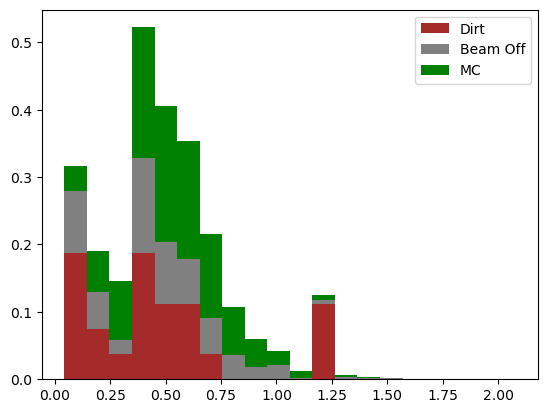

In [39]:
labels = ['Dirt', 'Beam Off', 'MC']
scales = [0.859135435982457, 0.6120891443352352, 1.0349370117350225]
hist_lst = [dirt_selected['Pp'], beam_off_selected['Pp'], MC_selected['Pp']]

weights = [
    np.full_like(data, scale / len(data))
    for data, scale in zip(hist_lst, scales)
]
plt.hist(hist_lst, bins = 20, stacked = True, color = ['brown', 'gray', 'green'], label = labels, weights = weights)
plt.legend();

In [41]:
with uproot.recreate('wc_MC.root') as f:
    f["MCdata"] = MC_selected

with uproot.recreate('wc_beam_off.root') as f:
    f["BeamOffdata"] = beam_off_selected

with uproot.recreate('wc_dirt.root') as f:
    f["Dirtdata"] = dirt_selected

with uproot.recreate('wc_beam_on.root') as f:
    f["BeamOndata"] = beam_on_selected